
# Assignment-15-XGBM_LGBM_Fraud_Check

Use XGBM and LGBM to prepare a model on fraud data <br/>
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df= pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [3]:
df.shape

(600, 6)

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
DF=pd.Series(df['Taxable.Income'])
su=[]
for i in DF:
    if i<=30000:
        su.append("risky")
    else:
        su.append('good')
        print(su)


['good']
['good', 'good']
['good', 'good', 'good']
['good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'r

['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'ris

In [6]:
DF2=pd.DataFrame(su)
DF2=pd.concat([DF2,df],axis=1)
DF2=DF2.rename({0:'Output'},axis=1)
DF2.head()

,Output,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,good,NO,Single,68833,50047,10,YES
1,good,YES,Divorced,33700,134075,18,YES
2,good,NO,Married,36925,160205,30,YES
3,good,YES,Single,50190,193264,15,YES
4,good,NO,Married,81002,27533,28,NO


In [7]:
labelencoder = preprocessing.LabelEncoder()
DF2.iloc[:,0]=labelencoder.fit_transform(DF2.iloc[:,0])
DF2.iloc[:,1]=labelencoder.fit_transform(DF2.iloc[:,1])
DF2.iloc[:,2]=labelencoder.fit_transform(DF2.iloc[:,2])
DF2.iloc[:,-1]=labelencoder.fit_transform(DF2.iloc[:,-1])

In [8]:
df=DF2

In [9]:
df.head()

,Output,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,2,68833,50047,10,1
1,0,1,0,33700,134075,18,1
2,0,0,1,36925,160205,30,1
3,0,1,2,50190,193264,15,1
4,0,0,1,81002,27533,28,0


In [10]:
x=df.iloc[:,1:7]
y=df['Output']

In [11]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Output, Length: 600, dtype: int32

## Splitting data into training and testing data set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

# XGBoost model

In [14]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

C:\Users\Chetana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [17]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [18]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

C:\Users\Chetana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

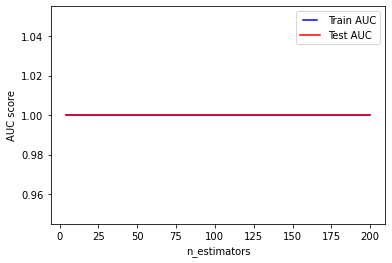

In [19]:
n_estimators = [4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   model = XGBClassifier(n_estimators=estimator, n_jobs=-1)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

# LGBM model

In [20]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [21]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [22]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 96, number of negative: 384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [23]:
#Prediction
y_pred=clf.predict(x_test)

In [24]:
predictions = [round(value) for value in y_pred]

In [25]:
accuracy = accuracy_score(y_test, predictions)

In [26]:
accuracy

0.7666666666666667